# Question2: Enzyme Kinetics

### 1.  Four equations for the rate of change 

By appling the law of mass action: 

define $[E]$, $[S]$, $[ES]$, $[P]$ as the concentration of four components respectively <br>

$\frac{d[E]}{dt} = k_2[ES] + k_3[ES] - k_1[E][S]$ <br>
$\frac{d[S]}{dt} = k_2[ES]- k_1[E][S] $ <br>
$\frac{d[ES]}{dt} =k_1[E][S]-k_2[ES]-k_3[ES] $ <br>
$\frac{d[P]}{dt} = k_3[ES]$

### 2. Coding solution for equations in 1 under given conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define 4 equations in question 2.1
def fe(t, e, s, es, p):
    return k1*e*s - k2*es - k3*es

def fs(t, e, s, es, p):
    return k1*e*s - k2*es

def fes(t, e, s, es, p):
    return k1*e*s - k2*es - k3*es

def fp(t, e, s, es, p):
    return k3*es

In [7]:
#rate constants given by the question
k1 = 100
k2 = 600
k3 = 150

#use list to store each iterations value
#given initial concentration of e,s,es,p
e = [1]
s = [10]
es = [0]
p = [0]

# set the step size h and interation number N, t is used to record time
t = [0]
h = 0.00001
N = 30000


General 4th-order runge-kutta method formula <br>
$k_1 = f(y(t_0),t_0)$ <br>
$k_2 = f(y(t_0)+k_1\frac{h}{2},t_0+\frac{h}{2})$ <br>
$k_3 = f(y(t_0+k_2\frac{h}{2}),t_0+\frac{h}{2})$ <br>
$k_4 = f(y(t_0)+k_3h,t_0+h)$ <br>
$y(t_0+h) = y(t_0)+\frac{h}{6}(k_1+2k_2+2k_3+k_4) $

In [8]:
# 4th order Runge-Kutta method to solve the ODEs
#coding the formula from above
#list[-1] takes the last value in the list to do calculation

for i in range(N):
    # for element E
    ke1 = fe(t[-1], e[-1], s[-1], es[-1], p[-1])
    ke2 = fe(t[-1]+h/2, e[-1]+ke1*h/2, s[-1]+ke1*h/2, es[-1]+ke1*h/2, p[-1]+h*ke1/2)
    ke3 = fe(t[-1]+h/2, e[-1]+ke2*h/2, s[-1]+ke2*h/2, es[-1]+ke2*h/2, p[-1]+h*ke2/2)
    ke4 = fe(t[-1]+h, e[-1]+h*ke3, s[-1]+h*ke3, es[-1]+h*ke3,p[-1]+h*ke3)
    et = e[-1] - h/6*(ke1 + 2*ke2 + 2*ke3 + ke4)
    
    
    # for element S
    ks1 = fs(t[-1], e[-1], s[-1], es[-1], p[-1])
    ks2 = fs(t[-1] + 0.5*h, e[-1] + 0.5*h*ks1, s[-1] + 0.5*h*ks1, es[-1] + 0.5*h*ks1, p[-1] + 0.5*h*ks1)
    ks3 = fs(t[-1] + 0.5*h, e[-1] + 0.5*h*ks2, s[-1] + 0.5*h*ks2, es[-1] + 0.5*h*ks2, p[-1] + 0.5*h*ks2)
    ks4 = fs(t[-1] + h, e[-1] + h*ks3, s[-1] + h*ks3, es[-1] + h*ks3, p[-1] + h*ks3)
    st = s[-1] - h/6*(ks1 + 2*ks2 + 2*ks3 + ks4)


    # for element ES
    kes1 = fes(t[-1], e[-1], s[-1], es[-1], p[-1])
    kes2 = fes(t[-1] + 0.5*h, e[-1] + 0.5*h*kes1, s[-1] + 0.5*h*kes1, es[-1] + 0.5*h*kes1, p[-1] + 0.5*h*kes1)
    kes3 = fes(t[-1] + 0.5*h, e[-1] + 0.5*h*kes2, s[-1] + 0.5*h*kes2, es[-1] + 0.5*h*kes2, p[-1] + 0.5*h*kes2)
    kes4 = fes(t[-1] + h, e[-1] + h*kes3, s[-1] + h*kes3, es[-1] + h*kes3, p[-1] + h*kes3)
    est = es[-1] + h/6*(kes1 + 2*kes2 + 2*kes3 + kes4)

    # for element P
    kp1 = fp(t[-1], e[-1], s[-1], es[-1], p[-1])
    kp2 = fp(t[-1] + 0.5*h, e[-1] + 0.5*h*kp1, s[-1] + 0.5*h*kp1, es[-1] + 0.5*h*kp1, p[-1] + 0.5*h*kp1)
    kp3 = fp(t[-1] + 0.5*h, e[-1] + 0.5*h*kp2, s[-1] + 0.5*h*kp2, es[-1] + 0.5*h*kp2, p[-1] + 0.5*h*kp2)
    kp4 = fp(t[-1] + h, e[-1] + h*kp3, s[-1] + h*kp3, es[-1] + h*kp3, p[-1] + h*kp3)
    pt = p[-1] + h/6*(kp1 + 2*kp2 + 2*kp3 + kp4)

    #store each iteration value into the list
    s.append(st)
    e.append(et)
    es.append(est)
    p.append(pt)
    
    t.append(t[-1] + h)




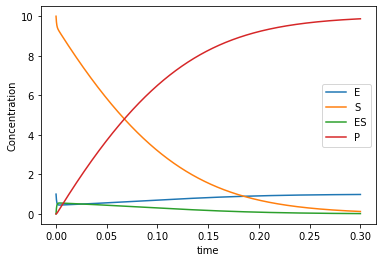

In [9]:
plt.plot(t, e, label='E')
plt.plot(t, s, label='S')
plt.plot(t, es, label='ES')
plt.plot(t, p, label='P')
plt.xlabel('time')
plt.ylabel('Concentration')

plt.legend()
plt.show()

### 3. Find velocity V <br>

As the equation funded in question 1, the fomula of V is: <br>
$V = \frac{d[P]}{dt} = k_3[ES]$

The max velocity: 82.66 uM/min


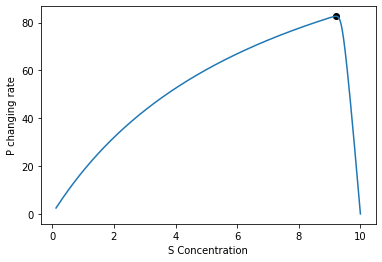

In [10]:
V = []
for i in range(len(es)):
    V.append(k3*es[i])
    
max_v = max(V)
mv_index = V.index(max_v)

print("The max velocity: "+ "%.2f" %max_v +" uM/min")

plt.xlabel('S Concentration')
plt.ylabel('P changing rate')
plt.plot(s[mv_index],V[mv_index],'ko') #draw the point
plt.plot(s, V)
plt.show()

reference: <br>
https://blog.csdn.net/qq_44183524/article/details/105911948?ops_request_misc=&request_id=&biz_id=102&utm_term=%E9%BE%99%E6%A0%BC%E5%BA%93%E5%A1%94%E8%A7%A3%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E7%BB%84&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-4-105911948.nonecase&spm=1018.2226.3001.4187